In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Oseias_1", "'word', 'lord', 'came', 'hosea', ',', 'son', 'beeri', ',', 'days', 'uzziah', ',', 'jotham', ',', 'ahaz', ',', 'hezekiah', ',', 'kings', 'judah', ',', 'days', 'jeroboam', 'son', 'joash', ',', 'king', 'israel.the', 'beginning', 'word', 'lord', 'hosea', '.', 'lord', 'said', 'hosea', ',', 'go', ',', 'take', 'wife', 'prostitutions', 'children', 'prostitutions', ':', 'land', 'committed', 'great', 'prostitution', ',', 'departing', 'lord.so', 'went', 'took', 'gomer', 'daughter', 'diblaim', ';', 'conceived', ',', 'bore', 'son.and', 'lord', 'said', ',', 'call', 'name', 'jezreel', ';', 'yet', 'little', ',', 'avenge', 'blood', 'jezreel', 'house', 'jehu', ',', 'cause', 'cease', 'kingdom', 'house', 'israel.and', 'shall', 'come', 'pass', 'day', ',', 'break', 'bow', 'israel', ',', 'valley', 'jezreel.and', 'conceived', ',', 'bore', 'daughter', '.', 'god', 'said', ',', 'call', 'name', 'loruhamah', ':', 'mercy', 'house', 'israel', ';', 'utterly', 'take', 'away.but', 'mercy', 'house', 'judah', ',', 'save', 'lord', 'god', ',', 'save', 'bow', ',', 'sword', ',', 'battle', ',', 'horses', ',', 'horsemen.now', 'weaned', 'loruhamah', ',', 'conceived', ',', 'bore', 'son.then', 'said', 'god', ',', 'call', 'name', 'loammi', ':', 'people', ',', 'god.yet', 'number', 'children', 'israel', 'shall', 'sand', 'sea', ',', 'measured', 'numbered', ';', 'shall', 'come', 'pass', ',', 'place', 'said', ',', 'people', ',', 'shall', 'said', ',', 'sons', 'living', 'god.then', 'shall', 'children', 'judah', 'children', 'israel', 'gathered', 'together', ',', 'appoint', 'one', 'head', ',', 'shall', 'come', 'land', ':', 'great', 'shall', 'day', 'jezreel', '.'"], 
               ["Oseias_2", "'say', 'brothers', ',', 'ammi', ';', 'sisters', ',', 'ruhamah.plead', 'mother', ',', 'plead', ':', 'wife', ',', 'neither', 'husband', ':', 'let', 'therefore', 'put', 'away', 'prostitutions', 'sight', ',', 'adulteries', 'breasts', ';', 'lest', 'strip', 'naked', ',', 'set', 'day', 'born', ',', 'make', 'wilderness', ',', 'set', 'like', 'dry', 'land', ',', 'slay', 'thirst.and', 'mercy', 'children', ';', 'children', 'prostitutions.for', 'mother', 'played', 'harlot', ':', 'conceived', 'done', 'shamefully', ':', 'said', ',', 'go', 'lovers', ',', 'give', 'bread', 'water', ',', 'wool', 'flax', ',', 'oil', 'drink.therefore', ',', 'behold', ',', 'hedge', 'way', 'thorns', ',', 'make', 'wall', ',', 'shall', 'find', 'paths.and', 'shall', 'follow', 'lovers', ',', 'shall', 'overtake', ';', 'shall', 'seek', ',', 'shall', 'find', ':', 'shall', 'say', ',', 'go', 'return', 'first', 'husband', ';', 'better', 'now.for', 'know', 'gave', 'corn', ',', 'wine', ',', 'oil', ',', 'multiplied', 'silver', 'gold', ',', 'prepared', 'baal.therefore', 'return', ',', 'take', 'away', 'corn', 'time', 'thereof', ',', 'wine', 'season', 'thereof', ',', 'recover', 'wool', 'flax', 'given', 'cover', 'nakedness.and', 'discover', 'lewdness', 'sight', 'lovers', ',', 'none', 'shall', 'deliver', 'hand.i', 'also', 'cause', 'mirth', 'cease', ',', 'feast', 'days', ',', 'new', 'moons', ',', 'sabbaths', ',', 'solemn', 'feasts.and', 'destroy', 'vines', 'fig', 'trees', ',', 'whereof', 'said', ',', 'rewards', 'lovers', 'given', ':', 'make', 'forest', ',', 'beasts', 'field', 'shall', 'eat', 'them.and', 'visit', 'days', 'baalim', ',', 'wherein', 'burned', 'incense', ',', 'decked', 'earrings', 'jewels', ',', 'went', 'lovers', ',', 'forgot', ',', 'said', 'lord.therefore', ',', 'behold', ',', 'allure', ',', 'bring', 'wilderness', ',', 'speak', 'comfortably', 'her.and', 'give', 'vineyards', ',', 'valley', 'achor', 'door', 'hope', ':', 'shall', 'sing', ',', 'days', 'youth', ',', 'day', 'came', 'land', 'egypt.and', 'shall', 'day', ',', 'said', 'lord', ',', 'shall', 'call', 'ishi', ';', 'shall', 'call', 'baali.for', 'take', 'away', 'names', 'baalim', 'mouth', ',', 'shall', 'remembered', 'name.and', 'day', 'make', 'covenant', 'beasts', 'field', 'fowls', 'heaven', ',', 'creeping', 'things', 'ground', ':', 'break', 'bow', 'sword', 'battle', 'earth', ',', 'make', 'lie', 'safely.and', 'betroth', 'ever', ';', 'yes', ',', 'betroth', 'righteousness', ',', 'judgment', ',', 'loving', 'kindness', ',', 'mercies.i', 'even', 'betroth', 'faithfulness', ':', 'shall', 'know', 'lord.and', 'shall', 'come', 'pass', 'day', ',', 'hear', ',', 'said', 'lord', ',', 'hear', 'heavens', ',', 'shall', 'hear', 'earth', ';', 'earth', 'shall', 'hear', 'corn', ',', 'wine', ',', 'oil', ';', 'shall', 'hear', 'jezreel.and', 'sow', 'earth', ';', 'mercy', 'obtained', 'mercy', ';', 'say', 'people', ',', 'people', ';', 'shall', 'say', ',', 'god', '.'"],
               ["Oseias_3", "'said', 'lord', ',', 'go', 'yet', ',', 'love', 'woman', 'beloved', 'friend', ',', 'yet', 'adulteress', ',', 'according', 'love', 'lord', 'toward', 'children', 'israel', ',', 'look', 'gods', ',', 'love', 'flagons', 'wine.so', 'bought', 'fifteen', 'pieces', 'silver', ',', 'homer', 'barley', ',', 'half', 'homer', 'barley', ':', 'said', ',', 'shall', 'abide', 'many', 'days', ';', 'shall', 'play', 'harlot', ',', 'shall', 'another', 'man', ':', 'also', 'you.for', 'children', 'israel', 'shall', 'abide', 'many', 'days', 'without', 'king', ',', 'without', 'prince', ',', 'without', 'sacrifice', ',', 'without', 'image', ',', 'without', 'ephod', ',', 'without', 'teraphim', ':', 'afterward', 'shall', 'children', 'israel', 'return', ',', 'seek', 'lord', 'god', ',', 'david', 'king', ';', 'shall', 'fear', 'lord', 'goodness', 'latter', 'days', '.'"],
               ["Oseias_4", "'hear', 'word', 'lord', ',', 'children', 'israel', ':', 'lord', 'controversy', 'inhabitants', 'land', ',', 'truth', ',', 'mercy', ',', 'knowledge', 'god', 'land.by', 'swearing', ',', 'lying', ',', 'killing', ',', 'stealing', ',', 'committing', 'adultery', ',', 'break', ',', 'blood', 'touches', 'blood.therefore', 'shall', 'land', 'mourn', ',', 'every', 'one', 'dwells', 'therein', 'shall', 'languish', ',', 'beasts', 'field', ',', 'fowls', 'heaven', ';', 'yes', ',', 'fishes', 'sea', 'also', 'shall', 'taken', 'away.yet', 'let', 'man', 'strive', ',', 'reprove', 'another', ':', 'people', 'strive', 'priest.therefore', 'shall', 'fall', 'day', ',', 'prophet', 'also', 'shall', 'fall', 'night', ',', 'destroy', 'mother.my', 'people', 'destroyed', 'lack', 'knowledge', ':', 'rejected', 'knowledge', ',', 'also', 'reject', ',', 'shall', 'priest', ':', 'seeing', 'forgotten', 'law', 'god', ',', 'also', 'forget', 'children.as', 'increased', ',', 'sinned', ':', 'therefore', 'change', 'glory', 'shame.they', 'eat', 'sin', 'people', ',', 'set', 'heart', 'iniquity.and', 'shall', ',', 'like', 'people', ',', 'like', 'priest', ':', 'punish', 'ways', ',', 'reward', 'doings.for', 'shall', 'eat', ',', 'enough', ':', 'shall', 'commit', 'prostitution', ',', 'shall', 'increase', ':', 'left', 'take', 'heed', 'lord.prostitution', 'wine', 'new', 'wine', 'take', 'away', 'heart.my', 'people', 'ask', 'counsel', 'stocks', ',', 'staff', 'declares', ':', 'spirit', 'prostitutions', 'caused', 'err', ',', 'gone', 'whoring', 'god.they', 'sacrifice', 'tops', 'mountains', ',', 'burn', 'incense', 'hills', ',', 'oaks', 'poplars', 'elms', ',', 'shadow', 'thereof', 'good', ':', 'therefore', 'daughters', 'shall', 'commit', 'prostitution', ',', 'spouses', 'shall', 'commit', 'adultery.i', 'punish', 'daughters', 'commit', 'prostitution', ',', 'spouses', 'commit', 'adultery', ':', 'separated', 'whores', ',', 'sacrifice', 'harlots', ':', 'therefore', 'people', 'understand', 'shall', 'fall.though', ',', 'israel', ',', 'play', 'harlot', ',', 'yet', 'let', 'judah', 'offend', ';', 'come', 'gilgal', ',', 'neither', 'go', 'bethaven', ',', 'swear', ',', 'lord', 'lives.for', 'israel', 'slides', 'back', 'backsliding', 'heifer', ':', 'lord', 'feed', 'lamb', 'large', 'place.ephraim', 'joined', 'idols', ':', 'let', 'alone.their', 'drink', 'sour', ':', 'committed', 'prostitution', 'continually', ':', 'rulers', 'shame', 'love', ',', 'give', 'you.the', 'wind', 'bound', 'wings', ',', 'shall', 'ashamed', 'sacrifices', '.'"],
               ["Oseias_5", "'hear', ',', 'priests', ';', 'listen', ',', 'house', 'israel', ';', 'give', 'ear', ',', 'house', 'king', ';', 'judgment', 'toward', ',', 'snare', 'mizpah', ',', 'net', 'spread', 'tabor.and', 'rebels', 'profound', 'make', 'slaughter', ',', 'though', 'rebuker', 'all.i', 'know', 'ephraim', ',', 'israel', 'hid', ':', ',', 'ephraim', ',', 'commit', 'prostitution', ',', 'israel', 'defiled.they', 'frame', 'doings', 'turn', 'god', ':', 'spirit', 'prostitutions', 'middle', ',', 'known', 'lord.and', 'pride', 'israel', 'testify', 'face', ':', 'therefore', 'shall', 'israel', 'ephraim', 'fall', 'iniquity', ':', 'judah', 'also', 'shall', 'fall', 'them.they', 'shall', 'go', 'flocks', 'herds', 'seek', 'lord', ';', 'shall', 'find', ';', 'withdrawn', 'them.they', 'dealt', 'treacherously', 'lord', ':', 'begotten', 'strange', 'children', ':', 'shall', 'month', 'devour', 'portions.blow', 'cornet', 'gibeah', ',', 'trumpet', 'ramah', ':', 'cry', 'aloud', 'bethaven', ',', ',', 'benjamin.ephraim', 'shall', 'desolate', 'day', 'rebuke', ':', 'among', 'tribes', 'israel', 'made', 'known', 'shall', 'surely', 'be.the', 'princes', 'judah', 'like', 'remove', 'bound', ':', 'therefore', 'pour', 'wrath', 'like', 'water.ephraim', 'oppressed', 'broken', 'judgment', ',', 'willingly', 'walked', 'commandment.therefore', 'ephraim', 'moth', ',', 'house', 'judah', 'rottenness.when', 'ephraim', 'saw', 'sickness', ',', 'judah', 'saw', 'wound', ',', 'went', 'ephraim', 'assyrian', ',', 'sent', 'king', 'jareb', ':', 'yet', 'could', 'heal', ',', 'cure', 'wound.for', 'ephraim', 'lion', ',', 'young', 'lion', 'house', 'judah', ':', ',', 'even', ',', 'tear', 'go', 'away', ';', 'take', 'away', ',', 'none', 'shall', 'rescue', 'him.i', 'go', 'return', 'place', ',', 'till', 'acknowledge', 'offense', ',', 'seek', 'face', ':', 'affliction', 'seek', 'early', '.'"],
               ["Oseias_6", "'come', ',', 'let', 'us', 'return', 'lord', ':', 'torn', ',', 'heal', 'us', ';', 'smitten', ',', 'bind', 'us', 'up.after', 'two', 'days', 'revive', 'us', ':', 'third', 'day', 'raise', 'us', ',', 'shall', 'live', 'sight.then', 'shall', 'know', ',', 'follow', 'know', 'lord', ':', 'going', 'forth', 'prepared', 'morning', ';', 'shall', 'come', 'us', 'rain', ',', 'latter', 'former', 'rain', 'eartho', 'ephraim', ',', 'shall', '?', 'judah', ',', 'shall', '?', 'goodness', 'morning', 'cloud', ',', 'early', 'dew', 'goes', 'away.therefore', 'hewed', 'prophets', ';', 'slain', 'words', 'mouth', ':', 'judgments', 'light', 'goes', 'forth.for', 'desired', 'mercy', ',', 'sacrifice', ';', 'knowledge', 'god', 'burnt', 'offerings.but', 'like', 'men', 'transgressed', 'covenant', ':', 'dealt', 'treacherously', 'me.gilead', 'city', 'work', 'iniquity', ',', 'polluted', 'blood.and', 'troops', 'robbers', 'wait', 'man', ',', 'company', 'priests', 'murder', 'way', 'consent', ':', 'commit', 'lewdness.i', 'seen', 'horrible', 'thing', 'house', 'israel', ':', 'prostitution', 'ephraim', ',', 'israel', 'defiled.also', ',', 'judah', ',', 'set', 'harvest', ',', 'returned', 'captivity', 'people', '.'"],
               ["Oseias_7", "'would', 'healed', 'israel', ',', 'iniquity', 'ephraim', 'discovered', ',', 'wickedness', 'samaria', ':', 'commit', 'falsehood', ';', 'thief', 'comes', ',', 'troop', 'robbers', 'spoils', 'without.and', 'consider', 'hearts', 'remember', 'wickedness', ':', 'doings', 'beset', ';', 'face.they', 'make', 'king', 'glad', 'wickedness', ',', 'princes', 'lies.they', 'adulterers', ',', 'oven', 'heated', 'baker', ',', 'ceases', 'raising', 'kneaded', 'dough', ',', 'leavened.in', 'day', 'king', 'princes', 'made', 'sick', 'bottles', 'wine', ';', 'stretched', 'hand', 'scorners.for', 'made', 'ready', 'heart', 'like', 'oven', ',', 'whiles', 'lie', 'wait', ':', 'baker', 'sleeps', 'night', ';', 'morning', 'burns', 'flaming', 'fire.they', 'hot', 'oven', ',', 'devoured', 'judges', ';', 'kings', 'fallen', ':', 'none', 'among', 'calls', 'me.ephraim', ',', 'mixed', 'among', 'people', ';', 'ephraim', 'cake', 'turned.strangers', 'devoured', 'strength', ',', 'knows', ':', 'yes', ',', 'gray', 'hairs', ',', 'yet', 'knows', 'not.and', 'pride', 'israel', 'testifies', 'face', ':', 'return', 'lord', 'god', ',', 'seek', 'this.ephraim', 'also', 'like', 'silly', 'dove', 'without', 'heart', ':', 'call', 'egypt', ',', 'go', 'assyria.when', 'shall', 'go', ',', 'spread', 'net', ';', 'bring', 'fowls', 'heaven', ';', 'chastise', ',', 'congregation', 'heard.woe', '!', 'fled', ':', 'destruction', '!', 'transgressed', ':', 'though', 'redeemed', ',', 'yet', 'spoken', 'lies', 'me.and', 'cried', 'heart', ',', 'howled', 'beds', ':', 'assemble', 'corn', 'wine', ',', 'rebel', 'me.though', 'bound', 'strengthened', 'arms', ',', 'yet', 'imagine', 'mischief', 'me.they', 'return', ',', 'high', ':', 'like', 'deceitful', 'bow', ':', 'princes', 'shall', 'fall', 'sword', 'rage', 'tongue', ':', 'shall', 'derision', 'land', 'egypt', '.'"],
               ["Oseias_8", "'set', 'trumpet', 'mouth', '.', 'shall', 'come', 'eagle', 'house', 'lord', ',', 'transgressed', 'covenant', ',', 'trespassed', 'law.israel', 'shall', 'cry', ',', 'god', ',', 'know', 'you.israel', 'cast', 'thing', 'good', ':', 'enemy', 'shall', 'pursue', 'him.they', 'set', 'kings', ',', ':', 'made', 'princes', ',', 'knew', ':', 'silver', 'gold', 'made', 'idols', ',', 'may', 'cut', 'off.your', 'calf', ',', 'samaria', ',', 'cast', ';', 'anger', 'kindled', ':', 'long', 'ere', 'attain', 'innocence', '?', 'israel', 'also', ':', 'workman', 'made', ';', 'therefore', 'god', ':', 'calf', 'samaria', 'shall', 'broken', 'pieces.for', 'sown', 'wind', ',', 'shall', 'reap', 'whirlwind', ':', 'stalk', ';', 'bud', 'shall', 'yield', 'meal', ':', 'yield', ',', 'strangers', 'shall', 'swallow', 'up.israel', 'swallowed', ':', 'shall', 'among', 'gentiles', 'vessel', 'wherein', 'pleasure.for', 'gone', 'assyria', ',', 'wild', 'ass', 'alone', ':', 'ephraim', 'hired', 'lovers.yes', ',', 'though', 'hired', 'among', 'nations', ',', 'gather', ',', 'shall', 'sorrow', 'little', 'burden', 'king', 'princes.because', 'ephraim', 'made', 'many', 'altars', 'sin', ',', 'altars', 'shall', 'sin.i', 'written', 'great', 'things', 'law', ',', 'counted', 'strange', 'thing.they', 'sacrifice', 'flesh', 'sacrifices', 'offerings', ',', 'eat', ';', 'lord', 'accepts', ';', 'remember', 'iniquity', ',', 'visit', 'sins', ':', 'shall', 'return', 'egypt.for', 'israel', 'forgotten', 'maker', ',', 'builds', 'temples', ';', 'judah', 'multiplied', 'fenced', 'cities', ':', 'send', 'fire', 'cities', ',', 'shall', 'devour', 'palaces', 'thereof', '.'"],
               ["Oseias_9", "'rejoice', ',', 'israel', ',', 'joy', ',', 'people', ':', 'gone', 'whoring', 'god', ',', 'loved', 'reward', 'every', 'corn', 'floor.the', 'floor', 'wine', 'press', 'shall', 'feed', ',', 'new', 'wine', 'shall', 'fail', 'her.they', 'shall', 'dwell', 'lord', ', 'land', ';', 'ephraim', 'shall', 'return', 'egypt', ',', 'shall', 'eat', 'unclean', 'things', 'assyria.they', 'shall', 'offer', 'wine', 'offerings', 'lord', ',', 'neither', 'shall', 'pleasing', ':', 'sacrifices', 'shall', 'bread', 'mourners', ';', 'eat', 'thereof', 'shall', 'polluted', ':', 'bread', 'soul', 'shall', 'come', 'house', 'lord.what', 'solemn', 'day', ',', 'day', 'feast', 'lord', '?', ',', 'see', ',', 'gone', 'destruction', ':', 'egypt', 'shall', 'gather', ',', 'memphis', 'shall', 'bury', ':', 'pleasant', 'places', 'silver', ',', 'nettles', 'shall', 'possess', ':', 'thorns', 'shall', 'tabernacles.the', 'days', 'visitation', 'come', ',', 'days', 'recompense', 'come', ';', 'israel', 'shall', 'know', ':', 'prophet', 'fool', ',', 'spiritual', 'man', 'mad', ',', 'multitude', 'iniquity', ',', 'great', 'hatred.the', 'watchman', 'ephraim', 'god', ':', 'prophet', 'snare', 'fowler', 'ways', ',', 'hatred', 'house', 'god.they', 'deeply', 'corrupted', ',', 'days', 'gibeah', ':', 'therefore', 'remember', 'iniquity', ',', 'visit', 'sins.i', 'found', 'israel', 'like', 'grapes', 'wilderness', ';', 'saw', 'fathers', 'first', 'ripe', 'fig', 'tree', 'first', 'time', ':', 'went', 'baalpeor', ',', 'separated', 'shame', ';', 'abominations', 'according', 'loved.as', 'ephraim', ',', 'glory', 'shall', 'fly', 'away', 'like', 'bird', ',', 'birth', ',', 'womb', ',', 'conception.though', 'bring', 'children', ',', 'yet', 'bereave', ',', 'shall', 'man', 'left', ':', 'yes', ',', 'woe', 'also', 'depart', '!', 'ephraim', ',', 'saw', 'tyrus', ',', 'planted', 'pleasant', 'place', ':', 'ephraim', 'shall', 'bring', 'forth', 'children', 'murderer.give', ',', 'lord', ':', 'give', '?', 'give', 'miscarrying', 'womb', 'dry', 'breasts.all', 'wickedness', 'gilgal', ':', 'hated', ':', 'wickedness', 'doings', 'drive', 'house', ',', 'love', ':', 'princes', 'rebels.ephraim', 'smitten', ',', 'root', 'dried', ',', 'shall', 'bear', 'fruit', ':', 'yes', ',', 'though', 'bring', 'forth', ',', 'yet', 'slay', 'even', 'beloved', 'fruit', 'womb.my', 'god', 'cast', 'away', ',', 'listen', ':', 'shall', 'wanderers', 'among', 'nations', '.'"],
               ["Oseias_10", "'israel', 'empty', 'vine', ',', 'brings', 'forth', 'fruit', ':', 'according', 'multitude', 'fruit', 'increased', 'altars', ';', 'according', 'goodness', 'land', 'made', 'goodly', 'images.their', 'heart', 'divided', ';', 'shall', 'found', 'faulty', ':', 'shall', 'break', 'altars', ',', 'shall', 'spoil', 'images.for', 'shall', 'say', ',', 'king', ',', 'feared', 'lord', ';', 'king', 'us', '?', 'spoken', 'words', ',', 'swearing', 'falsely', 'making', 'covenant', ':', 'thus', 'judgment', 'springs', 'hemlock', 'furrows', 'field.the', 'inhabitants', 'samaria', 'shall', 'fear', 'calves', 'bethaven', ':', 'people', 'thereof', 'shall', 'mourn', ',', 'priests', 'thereof', 'rejoiced', ',', 'glory', 'thereof', ',', 'departed', 'it.it', 'shall', 'also', 'carried', 'assyria', 'present', 'king', 'jareb', ':', 'ephraim', 'shall', 'receive', 'shame', ',', 'israel', 'shall', 'ashamed', 'counsel.as', 'samaria', ',', 'king', 'cut', 'foam', 'water.the', 'high', 'places', 'also', 'aven', ',', 'sin', 'israel', ',', 'shall', 'destroyed', ':', 'thorn', 'thistle', 'shall', 'come', 'altars', ';', 'shall', 'say', 'mountains', ',', 'cover', 'us', ';', 'hills', ',', 'fall', 'us.o', 'israel', ',', 'sinned', 'days', 'gibeah', ':', 'stood', ':', 'battle', 'gibeah', 'children', 'iniquity', 'overtake', 'them.it', 'desire', 'chastise', ';', 'people', 'shall', 'gathered', ',', 'shall', 'bind', 'two', 'furrows.and', 'ephraim', 'heifer', 'taught', ',', 'loves', 'tread', 'corn', ';', 'passed', 'fair', 'neck', ':', 'make', 'ephraim', 'ride', ';', 'judah', 'shall', 'plow', ',', 'jacob', 'shall', 'break', 'clods.sow', 'righteousness', ',', 'reap', 'mercy', ';', 'break', 'fallow', 'ground', ':', 'time', 'seek', 'lord', ',', 'till', 'come', 'rain', 'righteousness', 'you.you', 'plowed', 'wickedness', ',', 'reaped', 'iniquity', ';', 'eaten', 'fruit', 'lies', ':', 'trust', 'way', ',', 'multitude', 'mighty', 'men.therefore', 'shall', 'tumult', 'arise', 'among', 'people', ',', 'fortresses', 'shall', 'spoiled', ',', 'shalman', 'spoiled', 'betharbel', 'day', 'battle', ':', 'mother', 'dashed', 'pieces', 'children.so', 'shall', 'bethel', 'great', 'wickedness', ':', 'morning', 'shall', 'king', 'israel', 'utterly', 'cut', '.'"],
               ["Oseias_11", "'israel', 'child', ',', 'loved', ',', 'called', 'son', 'egypt.as', 'called', ',', 'went', ':', 'sacrificed', 'baalim', ',', 'burned', 'incense', 'graven', 'images.i', 'taught', 'ephraim', 'also', 'go', ',', 'taking', 'arms', ';', 'knew', 'healed', 'them.i', 'drew', 'cords', 'man', ',', 'bands', 'love', ':', 'take', 'yoke', 'jaws', ',', 'laid', 'meat', 'them.he', 'shall', 'return', 'land', 'egypt', ',', 'assyrian', 'shall', 'king', ',', 'refused', 'return.and', 'sword', 'shall', 'abide', 'cities', ',', 'shall', 'consume', 'branches', ',', 'devour', ',', 'counsels.and', 'people', 'bent', 'backsliding', ':', 'though', 'called', 'high', ',', 'none', 'would', 'exalt', 'him.how', 'shall', 'give', ',', 'ephraim', '?', 'shall', 'deliver', ',', 'israel', '?', 'shall', 'make', 'admah', '?', 'shall', 'set', 'zeboim', '?', 'heart', 'turned', 'within', ',', 'repentings', 'kindled', 'together.i', 'execute', 'fierceness', 'anger', ',', 'return', 'destroy', 'ephraim', ':', 'god', ',', 'man', ';', 'holy', 'one', 'middle', ':', 'enter', 'city.they', 'shall', 'walk', 'lord', ':', 'shall', 'roar', 'like', 'lion', ':', 'shall', 'roar', ',', 'children', 'shall', 'tremble', 'west.they', 'shall', 'tremble', 'bird', 'egypt', ',', 'dove', 'land', 'assyria', ':', 'place', 'houses', ',', 'said', 'lord.ephraim', 'compasses', 'lies', ',', 'house', 'israel', 'deceit', ':', 'judah', 'yet', 'rules', 'god', ',', 'faithful', 'saints', '.'"],
               ["Oseias_12", "'ephraim', 'feeds', 'wind', ',', 'follows', 'east', 'wind', ':', 'daily', 'increases', 'lies', 'desolation', ';', 'make', 'covenant', 'assyrians', ',', 'oil', 'carried', 'egypt.the', 'lord', 'also', 'controversy', 'judah', ',', 'punish', 'jacob', 'according', 'ways', ';', 'according', 'doings', 'recompense', 'him.he', 'took', 'brother', 'heel', 'womb', ',', 'strength', 'power', 'god', ':', 'yes', ',', 'power', 'angel', ',', 'prevailed', ':', 'wept', ',', 'made', 'supplication', ':', 'found', 'bethel', ',', 'spoke', 'us', ';', 'even', 'lord', 'god', 'hosts', ';', 'lord', 'memorial.therefore', 'turn', 'god', ':', 'keep', 'mercy', 'judgment', 'wait', 'god', 'continually.he', 'merchant', ',', 'balances', 'deceit', 'hand', ':', 'loves', 'oppress.and', 'ephraim', 'said', ',', 'yet', 'become', 'rich', ',', 'found', 'substance', ':', 'labors', 'shall', 'find', 'none', 'iniquity', 'sin.and', 'lord', 'god', 'land', 'egypt', 'yet', 'make', 'dwell', 'tabernacles', ',', 'days', 'solemn', 'feast.i', 'also', 'spoken', 'prophets', ',', 'multiplied', 'visions', ',', 'used', 'similitudes', ',', 'ministry', 'prophets.is', 'iniquity', 'gilead', '?', 'surely', 'vanity', ':', 'sacrifice', 'bullocks', 'gilgal', ';', 'yes', ',', 'altars', 'heaps', 'furrows', 'fields.and', 'jacob', 'fled', 'country', 'syria', ',', 'israel', 'served', 'wife', ',', 'wife', 'kept', 'sheep.and', 'prophet', 'lord', 'brought', 'israel', 'egypt', ',', 'prophet', 'preserved.ephraim', 'provoked', 'anger', 'bitterly', ':', 'therefore', 'shall', 'leave', 'blood', ',', 'reproach', 'shall', 'lord', 'return', '.'"],
               ["Oseias_13", "'ephraim', 'spoke', 'trembling', ',', 'exalted', 'israel', ';', 'offended', 'baal', ',', 'died.and', 'sin', ',', 'made', 'molten', 'images', 'silver', ',', 'idols', 'according', 'understanding', ',', 'work', 'craftsmen', ':', 'say', ',', 'let', 'men', 'sacrifice', 'kiss', 'calves.therefore', 'shall', 'morning', 'cloud', 'early', 'dew', 'passes', 'away', ',', 'chaff', 'driven', 'whirlwind', 'floor', ',', 'smoke', 'chimney.yet', 'lord', 'god', 'land', 'egypt', ',', 'shall', 'know', 'god', ':', 'savior', 'beside', 'me.i', 'know', 'wilderness', ',', 'land', 'great', 'drought.according', 'pasture', ',', 'filled', ';', 'filled', ',', 'heart', 'exalted', ';', 'therefore', 'forgotten', 'me.therefore', 'lion', ':', 'leopard', 'way', 'observe', ':', 'meet', 'bear', 'bereaved', 'whelps', ',', 'rend', 'lobe', 'heart', ',', 'devour', 'like', 'lion', ':', 'wild', 'beast', 'shall', 'tear', 'them.o', 'israel', ',', 'destroyed', ';', 'help.i', 'king', ':', 'may', 'save', 'cities', '?', 'judges', 'said', ',', 'give', 'king', 'princes', '?', 'gave', 'king', 'anger', ',', 'took', 'away', 'wrath.the', 'iniquity', 'ephraim', 'bound', ';', 'sin', 'hid.the', 'sorrows', 'travailing', 'woman', 'shall', 'come', ':', 'unwise', 'son', ';', 'stay', 'long', 'place', 'breaking', 'forth', 'children.i', 'ransom', 'power', 'grave', ';', 'redeem', 'death', ':', 'death', ',', 'plagues', ';', 'grave', ',', 'destruction', ':', 'repentance', 'shall', 'hid', 'eyes.though', 'fruitful', 'among', 'brothers', ',', 'east', 'wind', 'shall', 'come', ',', 'wind', 'lord', 'shall', 'come', 'wilderness', ',', 'spring', 'shall', 'become', 'dry', ',', 'fountain', 'shall', 'dried', ':', 'shall', 'spoil', 'treasure', 'pleasant', 'vessels.samaria', 'shall', 'become', 'desolate', ';', 'rebelled', 'god', ':', 'shall', 'fall', 'sword', ':', 'infants', 'shall', 'dashed', 'pieces', ',', 'women', 'child', 'shall', 'ripped', '.'"],
               ["Oseias_14", "'israel', ',', 'return', 'lord', 'god', ';', 'fallen', 'iniquity.take', 'words', ',', 'turn', 'lord', ':', 'say', ',', 'take', 'away', 'iniquity', ',', 'receive', 'us', 'graciously', ':', 'render', 'calves', 'lips.asshur', 'shall', 'save', 'us', ';', 'ride', 'horses', ':', 'neither', 'say', 'work', 'hands', ',', 'gods', ':', 'fatherless', 'finds', 'mercy.i', 'heal', 'backsliding', ',', 'love', 'freely', ':', 'anger', 'turned', 'away', 'him.i', 'dew', 'israel', ':', 'shall', 'grow', 'lily', ',', 'cast', 'forth', 'roots', 'lebanon.his', 'branches', 'shall', 'spread', ',', 'beauty', 'shall', 'olive', 'tree', ',', 'smell', 'lebanon.they', 'dwell', 'shadow', 'shall', 'return', ';', 'shall', 'revive', 'corn', ',', 'grow', 'vine', ':', 'scent', 'thereof', 'shall', 'wine', 'lebanon.ephraim', 'shall', 'say', ',', 'idols', '?', 'heard', ',', 'observed', ':', 'like', 'green', 'fir', 'tree', '.', 'fruit', 'found.who', 'wise', ',', 'shall', 'understand', 'things', '?', 'prudent', ',', 'shall', 'know', '?', 'ways', 'lord', 'right', ',', 'shall', 'walk', ':', 'transgressors', 'shall', 'fall', 'therein', '.'"],
               ["Amos_1", "'words', 'amos', ',', 'among', 'herdsmen', 'tekoa', ',', 'saw', 'concerning', 'israel', 'days', 'uzziah', 'king', 'judah', ',', 'days', 'jeroboam', 'son', 'joash', 'king', 'israel', ',', 'two', 'years', 'earthquake.and', 'said', ',', 'lord', 'roar', 'zion', ',', 'utter', 'voice', 'jerusalem', ';', 'habitations', 'shepherds', 'shall', 'mourn', ',', 'top', 'carmel', 'shall', 'wither.thus', 'said', 'lord', ';', 'three', 'transgressions', 'damascus', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'threshed', 'gilead', 'threshing', 'instruments', 'iron', ':', 'send', 'fire', 'house', 'hazael', ',', 'shall', 'devour', 'palaces', 'benhadad.i', 'break', 'also', 'bar', 'damascus', ',', 'cut', 'inhabitant', 'plain', 'aven', ',', 'holds', 'scepter', 'house', 'eden', ':', 'people', 'syria', 'shall', 'go', 'captivity', 'kir', ',', 'said', 'lord.thus', 'said', 'lord', ';', 'three', 'transgressions', 'gaza', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'carried', 'away', 'captive', 'whole', 'captivity', ',', 'deliver', 'edom', ':', 'send', 'fire', 'wall', 'gaza', ',', 'shall', 'devour', 'palaces', 'thereof', ':', 'cut', 'inhabitant', 'ashdod', ',', 'holds', 'scepter', 'ashkelon', ',', 'turn', 'hand', 'ekron', ':', 'remnant', 'philistines', 'shall', 'perish', ',', 'said', 'lord', 'god.thus', 'said', 'lord', ';', 'three', 'transgressions', 'tyrus', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'delivered', 'whole', 'captivity', 'edom', ',', 'remembered', 'brotherly', 'covenant', ':', 'send', 'fire', 'wall', 'tyrus', ',', 'shall', 'devour', 'palaces', 'thereof.thus', 'said', 'lord', ';', 'three', 'transgressions', 'edom', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'pursue', 'brother', 'sword', ',', 'cast', 'pity', ',', 'anger', 'tear', 'perpetually', ',', 'kept', 'wrath', 'ever', ':', 'send', 'fire', 'teman', ',', 'shall', 'devour', 'palaces', 'bozrah.thus', 'said', 'lord', ';', 'three', 'transgressions', 'children', 'ammon', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'ripped', 'women', 'child', 'gilead', ',', 'might', 'enlarge', 'border', ':', 'kindle', 'fire', 'wall', 'rabbah', ',', 'shall', 'devour', 'palaces', 'thereof', ',', 'shouting', 'day', 'battle', ',', 'tempest', 'day', 'whirlwind', ':', 'king', 'shall', 'go', 'captivity', ',', 'princes', 'together', ',', 'said', 'lord', '.'"],
               ["Amos_2", "'thus', 'said', 'lord', ';', 'three', 'transgressions', 'moab', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'burned', 'bones', 'king', 'edom', 'lime', ':', 'send', 'fire', 'moab', ',', 'shall', 'devour', 'palaces', 'kirioth', ':', 'moab', 'shall', 'die', 'tumult', ',', 'shouting', ',', 'sound', 'trumpet', ':', 'cut', 'judge', 'middle', 'thereof', ',', 'slay', 'princes', 'thereof', ',', 'said', 'lord.thus', 'said', 'lord', ';', 'three', 'transgressions', 'judah', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'despised', 'law', 'lord', ',', 'kept', 'commandments', ',', 'lies', 'caused', 'err', ',', 'fathers', 'walked', ':', 'send', 'fire', 'judah', ',', 'shall', 'devour', 'palaces', 'jerusalem.thus', 'said', 'lord', ';', 'three', 'transgressions', 'israel', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'sold', 'righteous', 'silver', ',', 'poor', 'pair', 'shoes', ';', 'pant', 'dust', 'earth', 'head', 'poor', ',', 'turn', 'aside', 'way', 'meek', ':', 'man', 'father', 'go', 'maid', ',', 'profane', 'holy', 'name', ':', 'lay', 'clothes', 'laid', 'pledge', 'every', 'altar', ',', 'drink', 'wine', 'condemned', 'house', 'god.yet', 'destroyed', 'amorite', ',', 'whose', 'height', 'like', 'height', 'cedars', ',', 'strong', 'oaks', ';', 'yet', 'destroyed', 'fruit', ',', 'roots', 'beneath.also', 'brought', 'land', 'egypt', ',', 'led', 'forty', 'years', 'wilderness', ',', 'possess', 'land', 'amorite.and', 'raised', 'sons', 'prophets', ',', 'young', 'men', 'nazarites', '.', 'even', 'thus', ',', 'children', 'israel', '?', 'said', 'lord.but', 'gave', 'nazarites', 'wine', 'drink', ';', 'commanded', 'prophets', ',', 'saying', ',', 'prophesy', 'not.behold', ',', 'pressed', ',', 'cart', 'pressed', 'full', 'sheaves.therefore', 'flight', 'shall', 'perish', 'swift', ',', 'strong', 'shall', 'strengthen', 'force', ',', 'neither', 'shall', 'mighty', 'deliver', ':', 'neither', 'shall', 'stand', 'handles', 'bow', ';', 'swift', 'foot', 'shall', 'deliver', ':', 'neither', 'shall', 'rides', 'horse', 'deliver', 'himself.and', 'courageous', 'among', 'mighty', 'shall', 'flee', 'away', 'naked', 'day', ',', 'said', 'lord', '.'"],
               ["Amos_3", "'hear', 'word', 'lord', 'spoken', ',', 'children', 'israel', ',', 'whole', 'family', 'brought', 'land', 'egypt', ',', 'saying', ',', 'known', 'families', 'earth', ':', 'therefore', 'punish', 'iniquities.can', 'two', 'walk', 'together', ',', 'except', 'agreed', '?', 'lion', 'roar', 'forest', ',', 'prey', '?', 'young', 'lion', 'cry', 'den', ',', 'taken', 'nothing', '?', 'bird', 'fall', 'snare', 'earth', ',', 'gin', '?', 'shall', 'one', 'take', 'snare', 'earth', ',', 'taken', 'nothing', '?', 'shall', 'trumpet', 'blown', 'city', ',', 'people', 'afraid', '?', 'shall', 'evil', 'city', ',', 'lord', 'done', '?', 'surely', 'lord', 'god', 'nothing', ',', 'reveals', 'secret', 'servants', 'prophets.the', 'lion', 'roared', ',', 'fear', '?', 'lord', 'god', 'spoken', ',', 'prophesy', '?', 'publish', 'palaces', 'ashdod', ',', 'palaces', 'land', 'egypt', ',', 'say', ',', 'assemble', 'mountains', 'samaria', ',', 'behold', 'great', 'tumults', 'middle', 'thereof', ',', 'oppressed', 'middle', 'thereof.for', 'know', 'right', ',', 'said', 'lord', ',', 'store', 'violence', 'robbery', 'palaces.therefore', 'thus', 'said', 'lord', 'god', ';', 'adversary', 'shall', 'even', 'round', 'land', ';', 'shall', 'bring', 'strength', ',', 'palaces', 'shall', 'spoiled.thus', 'said', 'lord', ';', 'shepherd', 'takes', 'mouth', 'lion', 'two', 'legs', ',', 'piece', 'ear', ';', 'shall', 'children', 'israel', 'taken', 'dwell', 'samaria', 'corner', 'bed', ',', 'damascus', 'couch.hear', ',', 'testify', 'house', 'jacob', ',', 'said', 'lord', 'god', ',', 'god', 'hosts', ',', 'day', 'shall', 'visit', 'transgressions', 'israel', 'also', 'visit', 'altars', 'bethel', ':', 'horns', 'altar', 'shall', 'cut', ',', 'fall', 'ground.and', 'smite', 'winter', 'house', 'summer', 'house', ';', 'houses', 'ivory', 'shall', 'perish', ',', 'great', 'houses', 'shall', 'end', ',', 'said', 'lord', '.'"],
               ["Amos_4", "'hear', 'word', ',', 'cows', 'bashan', ',', 'mountain', 'samaria', ',', 'oppress', 'poor', ',', 'crush', 'needy', ',', 'say', 'masters', ',', 'bring', ',', 'let', 'us', 'drink.the', 'lord', 'god', 'sworn', 'holiness', ',', ',', 'see', ',', 'days', 'shall', 'come', ',', 'take', 'away', 'hooks', ',', 'posterity', 'fishhooks.and', 'shall', 'go', 'breaches', ',', 'every', 'cow', ';', 'shall', 'cast', 'palace', ',', 'said', 'lord.come', 'bethel', ',', 'transgress', ';', 'gilgal', 'multiply', 'transgression', ';', 'bring', 'sacrifices', 'every', 'morning', ',', 'tithes', 'three', 'years', ':', 'offer', 'sacrifice', 'thanksgiving', 'leaven', ',', 'proclaim', 'publish', 'free', 'offerings', ':', 'likes', ',', 'children', 'israel', ',', 'said', 'lord', 'god.and', 'also', 'given', 'cleanness', 'teeth', 'cities', ',', 'want', 'bread', 'places', ':', 'yet', 'returned', ',', 'said', 'lord.and', 'also', 'withheld', 'rain', ',', 'yet', 'three', 'months', 'harvest', ':', 'caused', 'rain', 'one', 'city', ',', 'caused', 'rain', 'another', 'city', ':', 'one', 'piece', 'rained', ',', 'piece', 'whereupon', 'rained', 'withered.so', 'two', 'three', 'cities', 'wandered', 'one', 'city', ',', 'drink', 'water', ';', 'satisfied', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'smitten', 'blasting', 'mildew', ':', 'gardens', 'vineyards', 'fig', 'trees', 'olive', 'trees', 'increased', ',', 'palmerworm', 'devoured', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'sent', 'among', 'pestilence', 'manner', 'egypt', ':', 'young', 'men', 'slain', 'sword', ',', 'taken', 'away', 'horses', ';', 'made', 'stink', 'camps', 'come', 'nostrils', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'overthrown', ',', 'god', 'overthrew', 'sodom', 'gomorrah', ',', 'firebrand', 'plucked', 'burning', ':', 'yet', 'returned', ',', 'said', 'lord.therefore', 'thus', ',', 'israel', ':', ',', 'prepare', 'meet', 'god', ',', 'israel.for', ',', 'see', ',', 'forms', 'mountains', ',', 'creates', 'wind', ',', 'declares', 'man', 'thought', ',', 'makes', 'morning', 'darkness', ',', 'treads', 'high', 'places', 'earth', ',', 'lord', ',', 'god', 'hosts', ',', 'name', '.'"],
               ["Amos_5", "'hear', 'word', 'take', ',', 'even', 'lamentation', ',', 'house', 'israel.the', 'virgin', 'israel', 'fallen', ';', 'shall', 'rise', ':', 'forsaken', 'land', ';', 'none', 'raise', 'up.for', 'thus', 'said', 'lord', 'god', ';', 'city', 'went', 'thousand', 'shall', 'leave', 'hundred', ',', 'went', 'forth', 'hundred', 'shall', 'leave', 'ten', ',', 'house', 'israel.for', 'thus', 'said', 'lord', 'house', 'israel', ',', 'seek', ',', 'shall', 'live', ':', 'seek', 'bethel', ',', 'enter', 'gilgal', ',', 'pass', 'beersheba', ':', 'gilgal', 'shall', 'surely', 'go', 'captivity', ',', 'bethel', 'shall', 'come', 'nothing.seek', 'lord', ',', 'shall', 'live', ';', 'lest', 'break', 'like', 'fire', 'house', 'joseph', ',', 'devour', ',', 'none', 'quench', 'bethel.you', 'turn', 'judgment', 'wormwood', ',', 'leave', 'righteousness', 'earth', ',', 'seek', 'makes', 'seven', 'stars', 'orion', ',', 'turns', 'shadow', 'death', 'morning', ',', 'makes', 'day', 'dark', 'night', ':', 'calls', 'waters', 'sea', ',', 'pours', 'face', 'earth', ':', 'lord', 'name', ':', 'strengthens', 'spoiled', 'strong', ',', 'spoiled', 'shall', 'come', 'fortress.they', 'hate', 'rebukes', 'gate', ',', 'abhor', 'speaks', 'uprightly.for', 'much', 'therefore', 'treading', 'poor', ',', 'take', 'burdens', 'wheat', ':', 'built', 'houses', 'hewn', 'stone', ',', 'shall', 'dwell', ';', 'planted', 'pleasant', 'vineyards', ',', 'shall', 'drink', 'wine', 'them.for', 'know', 'manifold', 'transgressions', 'mighty', 'sins', ':', 'afflict', ',', 'take', 'bribe', ',', 'turn', 'aside', 'poor', 'gate', 'right.therefore', 'prudent', 'shall', 'keep', 'silence', 'time', ';', 'evil', 'time.seek', 'good', ',', 'evil', ',', 'may', 'live', ':', 'lord', ',', 'god', 'hosts', ',', 'shall', ',', 'spoken.hate', 'evil', ',', 'love', 'good', ',', 'establish', 'judgment', 'gate', ':', 'may', 'lord', 'god', 'hosts', 'gracious', 'remnant', 'joseph.therefore', 'lord', ',', 'god', 'hosts', ',', 'lord', ',', 'said', 'thus', ';', 'wailing', 'shall', 'streets', ';', 'shall', 'say', 'highways', ',', 'alas', '!', 'alas', '!', 'shall', 'call', 'farmer', 'mourning', ',', 'skillful', 'lamentation', 'wailing.and', 'vineyards', 'shall', 'wailing', ':', 'pass', ',', 'said', 'lord.woe', 'desire', 'day', 'lord', '!', 'end', '?', 'day', 'lord', 'darkness', ',', 'light.as', 'man', 'flee', 'lion', ',', 'bear', 'met', ';', 'went', 'house', ',', 'leaned', 'hand', 'wall', ',', 'serpent', 'bit', 'him.shall', 'day', 'lord', 'darkness', ',', 'light', '?', 'even', 'dark', ',', 'brightness', '?', 'hate', ',', 'despise', 'feast', 'days', ',', 'smell', 'solemn', 'assemblies.though', 'offer', 'burnt', 'offerings', 'meat', 'offerings', ',', 'accept', ':', 'neither', 'regard', 'peace', 'offerings', 'fat', 'beasts.take', 'away', 'noise', 'songs', ';', 'hear', 'melody', 'viols.but', 'let', 'judgment', 'run', 'waters', ',', 'righteousness', 'mighty', 'stream.have', 'offered', 'sacrifices', 'offerings', 'wilderness', 'forty', 'years', ',', 'house', 'israel', '?', 'borne', 'tabernacle', 'moloch', 'chiun', 'images', ',', 'star', 'god', ',', 'made', 'yourselves.therefore', 'cause', 'go', 'captivity', 'beyond', 'damascus', ',', 'said', 'lord', ',', 'whose', 'name', 'god', 'hosts', '.'"],
               ["Amos_6", "'woe', 'ease', 'zion', ',', 'trust', 'mountain', 'samaria', ',', 'named', 'chief', 'nations', ',', 'house', 'israel', 'came', '!', 'pass', 'calneh', ',', 'see', ';', 'go', 'hamath', 'great', ':', 'go', 'gath', 'philistines', ':', 'better', 'kingdoms', '?', 'border', 'greater', 'border', '?', 'put', 'far', 'away', 'evil', 'day', ',', 'cause', 'seat', 'violence', 'come', 'near', ';', 'lie', 'beds', 'ivory', ',', 'stretch', 'couches', ',', 'eat', 'lambs', 'flock', ',', 'calves', 'middle', 'stall', ';', 'chant', 'sound', 'viol', ',', 'invent', 'instruments', 'music', ',', 'like', 'david', ';', 'drink', 'wine', 'bowls', ',', 'anoint', 'chief', 'ointments', ':', 'grieved', 'affliction', 'joseph.therefore', 'shall', 'go', 'captive', 'first', 'go', 'captive', ',', 'banquet', 'stretched', 'shall', 'removed.the', 'lord', 'god', 'sworn', ',', 'said', 'lord', 'god', 'hosts', ',', 'abhor', 'excellency', 'jacob', ',', 'hate', 'palaces', ':', 'therefore', 'deliver', 'city', 'therein.and', 'shall', 'come', 'pass', ',', 'remain', 'ten', 'men', 'one', 'house', ',', 'shall', 'die.and', 'man', ', 'uncle', 'shall', 'take', ',', 'burns', ',', 'bring', 'bones', 'house', ',', 'shall', 'say', 'sides', 'house', ',', 'yet', '?', 'shall', 'say', ',', '.', 'shall', 'say', ',', 'hold', 'tongue', ':', 'may', 'make', 'mention', 'name', 'lord.for', ',', 'behold', ',', 'lord', 'commands', ',', 'smite', 'great', 'house', 'breaches', ',', 'little', 'house', 'clefts.shall', 'horses', 'run', 'rock', '?', 'one', 'plow', 'oxen', '?', 'turned', 'judgment', 'gall', ',', 'fruit', 'righteousness', 'hemlock', ':', 'rejoice', 'thing', 'nothing', ',', 'say', ',', 'taken', 'us', 'horns', 'strength', '?', ',', 'behold', ',', 'raise', 'nation', ',', 'house', 'israel', ',', 'said', 'lord', 'god', 'hosts', ';', 'shall', 'afflict', 'entering', 'hemath', 'river', 'wilderness', '.'"],
               ["Amos_7", "'thus', 'lord', 'god', 'showed', ';', ',', 'behold', ',', 'formed', 'grasshoppers', 'beginning', 'shooting', 'latter', 'growth', ';', ',', 'see', ',', 'latter', 'growth', 'king', ', 'mowings.and', 'came', 'pass', ',', 'made', 'end', 'eating', 'grass', 'land', ',', 'said', ',', 'lord', 'god', ',', 'forgive', ',', 'beseech', ':', 'shall', 'jacob', 'arise', '?', 'small.the', 'lord', 'repented', ':', 'shall', ',', 'said', 'lord.thus', 'lord', 'god', 'showed', ':', ',', 'behold', ',', 'lord', 'god', 'called', 'contend', 'fire', ',', 'devoured', 'great', 'deep', ',', 'eat', 'part.then', 'said', ',', 'lord', 'god', ',', 'cease', ',', 'beseech', ':', 'shall', 'jacob', 'arise', '?', 'small.the', 'lord', 'repented', ':', 'also', 'shall', ',', 'said', 'lord', 'god.thus', 'showed', ':', ',', 'behold', ',', 'lord', 'stood', 'wall', 'made', 'plumb', 'line', ',', 'plumb', 'line', 'hand.and', 'lord', 'said', ',', 'amos', ',', 'see', '?', 'said', ',', 'plumb', 'line', '.', 'said', 'lord', ',', 'behold', ',', 'set', 'plumb', 'line', 'middle', 'people', 'israel', ':', 'pass', ':', 'high', 'places', 'isaac', 'shall', 'desolate', ',', 'sanctuaries', 'israel', 'shall', 'laid', 'waste', ';', 'rise', 'house', 'jeroboam', 'sword.then', 'amaziah', 'priest', 'bethel', 'sent', 'jeroboam', 'king', 'israel', ',', 'saying', ',', 'amos', 'conspired', 'middle', 'house', 'israel', ':', 'land', 'able', 'bear', 'words.for', 'thus', 'amos', 'said', ',', 'jeroboam', 'shall', 'die', 'sword', ',', 'israel', 'shall', 'surely', 'led', 'away', 'captive', 'land.also', 'amaziah', 'said', 'amos', ',', 'seer', ',', 'go', ',', 'flee', 'away', 'land', 'judah', ',', 'eat', 'bread', ',', 'prophesy', ':', 'prophesy', 'bethel', ':', 'king', ', 'chapel', ',', 'king', ', 'court.then', 'answered', 'amos', ',', 'said', 'amaziah', ',', 'prophet', ',', 'neither', 'prophet', ', 'son', ';', 'herdsman', ',', 'gatherer', 'sycomore', 'fruit', ':', 'lord', 'took', 'followed', 'flock', ',', 'lord', 'said', ',', 'go', ',', 'prophesy', 'people', 'israel.now', 'therefore', 'hear', 'word', 'lord', ':', 'say', ',', 'prophesy', 'israel', ',', 'drop', 'word', 'house', 'isaac.therefore', 'thus', 'said', 'lord', ';', 'wife', 'shall', 'harlot', 'city', ',', 'sons', 'daughters', 'shall', 'fall', 'sword', ',', 'land', 'shall', 'divided', 'line', ';', 'shall', 'die', 'polluted', 'land', ':', 'israel', 'shall', 'surely', 'go', 'captivity', 'forth', 'land', '.'"],
               ["Amos_8", "'thus', 'lord', 'god', 'showed', ':', 'behold', 'basket', 'summer', 'fruit.and', 'said', ',', 'amos', ',', 'see', '?', 'said', ',', 'basket', 'summer', 'fruit', '.', 'said', 'lord', ',', 'end', 'come', 'people', 'israel', ';', 'pass', 'more.and', 'songs', 'temple', 'shall', 'howlings', 'day', ',', 'said', 'lord', 'god', ':', 'shall', 'many', 'dead', 'bodies', 'every', 'place', ';', 'shall', 'cast', 'forth', 'silence.hear', ',', 'swallow', 'needy', ',', 'even', 'make', 'poor', 'land', 'fail', ',', 'saying', ',', 'new', 'moon', 'gone', ',', 'may', 'sell', 'corn', '?', 'sabbath', ',', 'may', 'set', 'forth', 'wheat', ',', 'making', 'ephah', 'small', ',', 'shekel', 'great', ',', 'falsifying', 'balances', 'deceit', '?', 'may', 'buy', 'poor', 'silver', ',', 'needy', 'pair', 'shoes', ';', 'yes', ',', 'sell', 'refuse', 'wheat', '?', 'lord', 'sworn', 'excellency', 'jacob', ',', 'surely', 'never', 'forget', 'works.shall', 'land', 'tremble', ',', 'every', 'one', 'mourn', 'dwells', 'therein', '?', 'shall', 'rise', 'wholly', 'flood', ';', 'shall', 'cast', 'drowned', ',', 'flood', 'egypt.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', 'god', ',', 'cause', 'sun', 'go', 'noon', ',', 'darken', 'earth', 'clear', 'day', ':', 'turn', 'feasts', 'mourning', ',', 'songs', 'lamentation', ';', 'bring', 'sackcloth', 'loins', ',', 'baldness', 'every', 'head', ';', 'make', 'mourning', 'son', ',', 'end', 'thereof', 'bitter', 'day.behold', ',', 'days', 'come', ',', 'said', 'lord', 'god', ',', 'send', 'famine', 'land', ',', 'famine', 'bread', ',', 'thirst', 'water', ',', 'hearing', 'words', 'lord', ':', 'shall', 'wander', 'sea', 'sea', ',', 'north', 'even', 'east', ',', 'shall', 'run', 'fro', 'seek', 'word', 'lord', ',', 'shall', 'find', 'it.in', 'day', 'shall', 'fair', 'virgins', 'young', 'men', 'faint', 'thirst.they', 'swear', 'sin', 'samaria', ',', 'say', ',', 'god', ',', 'dan', ',', 'lives', ';', ',', 'manner', 'beersheba', 'lives', ';', 'even', 'shall', 'fall', ',', 'never', 'rise', '.'"],
               ["Amos_9", "'saw', 'lord', 'standing', 'altar', ':', 'said', ',', 'smite', 'lintel', 'door', ',', 'posts', 'may', 'shake', ':', 'cut', 'head', ',', ';', 'slay', 'last', 'sword', ':', 'flees', 'shall', 'flee', 'away', ',', 'escapes', 'shall', 'delivered.though', 'dig', 'hell', ',', 'shall', 'hand', 'take', ';', 'though', 'climb', 'heaven', ',', 'bring', ':', 'though', 'hide', 'top', 'carmel', ',', 'search', 'take', ';', 'though', 'hid', 'sight', 'bottom', 'sea', ',', 'command', 'serpent', ',', 'shall', 'bite', ':', 'though', 'go', 'captivity', 'enemies', ',', 'command', 'sword', ',', 'shall', 'slay', ':', 'set', 'eyes', 'evil', ',', 'good.and', 'lord', 'god', 'hosts', 'touches', 'land', ',', 'shall', 'melt', ',', 'dwell', 'therein', 'shall', 'mourn', ':', 'shall', 'rise', 'wholly', 'like', 'flood', ';', 'shall', 'drowned', ',', 'flood', 'egypt.it', 'builds', 'stories', 'heaven', ',', 'founded', 'troop', 'earth', ';', 'calls', 'waters', 'sea', ',', 'pours', 'face', 'earth', ':', 'lord', 'name.are', 'children', 'ethiopians', ',', 'children', 'israel', '?', 'said', 'lord', '.', 'brought', 'israel', 'land', 'egypt', '?', 'philistines', 'caphtor', ',', 'syrians', 'kir', '?', 'behold', ',', 'eyes', 'lord', 'god', 'sinful', 'kingdom', ',', 'destroy', 'face', 'earth', ';', 'saving', 'utterly', 'destroy', 'house', 'jacob', ',', 'said', 'lord.for', ',', 'see', ',', 'command', ',', 'sift', 'house', 'israel', 'among', 'nations', ',', 'like', 'corn', 'sifted', 'sieve', ',', 'yet', 'shall', 'least', 'grain', 'fall', 'earth.all', 'sinners', 'people', 'shall', 'die', 'sword', ',', 'say', ',', 'evil', 'shall', 'overtake', 'prevent', 'us.in', 'day', 'raise', 'tabernacle', 'david', 'fallen', ',', 'close', 'breaches', 'thereof', ';', 'raise', 'ruins', ',', 'build', 'days', 'old', ':', 'may', 'possess', 'remnant', 'edom', ',', 'heathen', ',', 'called', 'name', ',', 'said', 'lord', 'this.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'plowman', 'shall', 'overtake', 'reaper', ',', 'treader', 'grapes', 'sows', 'seed', ';', 'mountains', 'shall', 'drop', 'sweet', 'wine', ',', 'hills', 'shall', 'melt.and', 'bring', 'captivity', 'people', 'israel', ',', 'shall', 'build', 'waste', 'cities', ',', 'inhabit', ';', 'shall', 'plant', 'vineyards', ',', 'drink', 'wine', 'thereof', ';', 'shall', 'also', 'make', 'gardens', ',', 'eat', 'fruit', 'them.and', 'plant', 'land', ',', 'shall', 'pulled', 'land', 'given', ',', 'said', 'lord', 'god', '.'"]])

In [6]:
df = pd.DataFrame(data, index=range(100,123),columns=['Autor', 'Livro'])

In [7]:
print(df)

         Autor                                              Livro
100   Oseias_1  'word', 'lord', 'came', 'hosea', ',', 'son', '...
101   Oseias_2  'say', 'brothers', ',', 'ammi', ';', 'sisters'...
102   Oseias_3  'said', 'lord', ',', 'go', 'yet', ',', 'love',...
103   Oseias_4  'hear', 'word', 'lord', ',', 'children', 'isra...
104   Oseias_5  'hear', ',', 'priests', ';', 'listen', ',', 'h...
105   Oseias_6  'come', ',', 'let', 'us', 'return', 'lord', ':...
106   Oseias_7  'would', 'healed', 'israel', ',', 'iniquity', ...
107   Oseias_8  'set', 'trumpet', 'mouth', '.', 'shall', 'come...
108   Oseias_9  'rejoice', ',', 'israel', ',', 'joy', ',', 'pe...
109  Oseias_10  'israel', 'empty', 'vine', ',', 'brings', 'for...
110  Oseias_11  'israel', 'child', ',', 'loved', ',', 'called'...
111  Oseias_12  'ephraim', 'feeds', 'wind', ',', 'follows', 'e...
112  Oseias_13  'ephraim', 'spoke', 'trembling', ',', 'exalted...
113  Oseias_14  'israel', ',', 'return', 'lord', 'god', ';', '...
114     Am

In [8]:
corpus = df['Livro'].tolist()

In [9]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

23 rows


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
conceived bore son,0.160331,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
said call name,0.160331,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
shall come pass,0.118175,0.044751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.056507,0.0,0.0529,0.0
ahaz hezekiah kings,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
and conceived bore,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
appoint one head,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
avenge blood jezreel,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
away but mercy,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
battle horses horsemen,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0
beeri days uzziah,0.080166,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0


In [10]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [11]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [12]:
k = 4
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


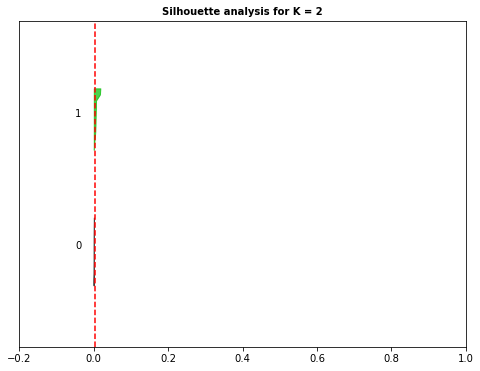

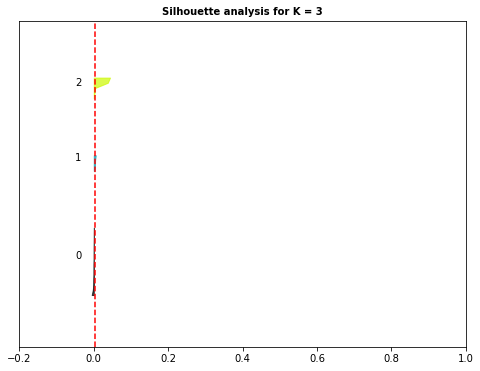

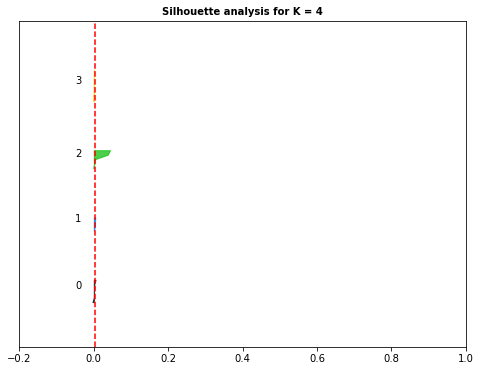

In [13]:
silhouette(kmeans_results, final_df, plot=True)

In [14]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

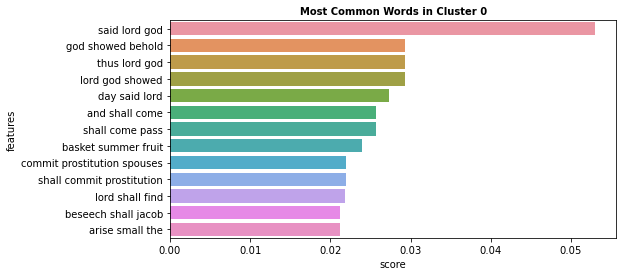

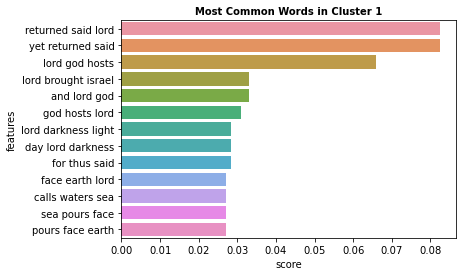

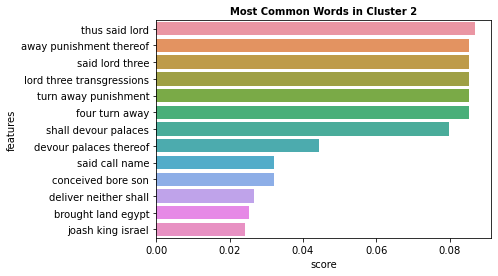

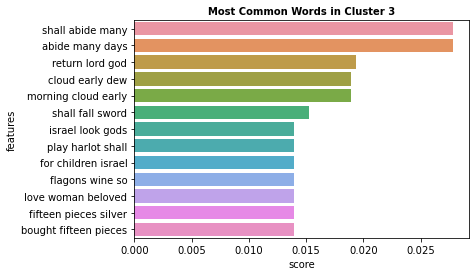

In [15]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [16]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

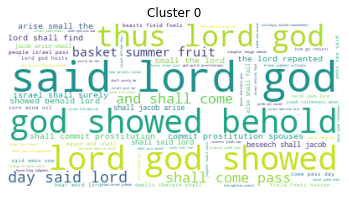

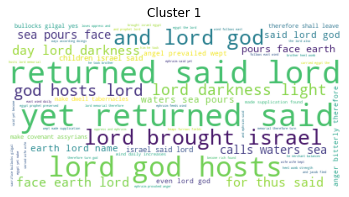

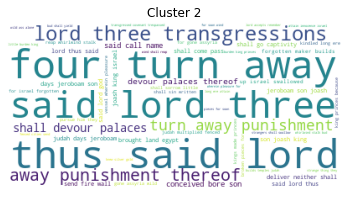

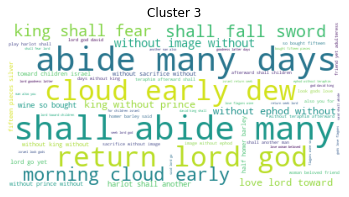

In [17]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [18]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Oseias_1,"'word', 'lord', 'came', 'hosea', ',', 'son', '...",2
101,Oseias_2,"'say', 'brothers', ',', 'ammi', ';', 'sisters'...",0
102,Oseias_3,"'said', 'lord', ',', 'go', 'yet', ',', 'love',...",3
103,Oseias_4,"'hear', 'word', 'lord', ',', 'children', 'isra...",0
104,Oseias_5,"'hear', ',', 'priests', ';', 'listen', ',', 'h...",0


In [19]:
print(df)

         Autor                                              Livro  label
100   Oseias_1  'word', 'lord', 'came', 'hosea', ',', 'son', '...      2
101   Oseias_2  'say', 'brothers', ',', 'ammi', ';', 'sisters'...      0
102   Oseias_3  'said', 'lord', ',', 'go', 'yet', ',', 'love',...      3
103   Oseias_4  'hear', 'word', 'lord', ',', 'children', 'isra...      0
104   Oseias_5  'hear', ',', 'priests', ';', 'listen', ',', 'h...      0
105   Oseias_6  'come', ',', 'let', 'us', 'return', 'lord', ':...      3
106   Oseias_7  'would', 'healed', 'israel', ',', 'iniquity', ...      3
107   Oseias_8  'set', 'trumpet', 'mouth', '.', 'shall', 'come...      2
108   Oseias_9  'rejoice', ',', 'israel', ',', 'joy', ',', 'pe...      3
109  Oseias_10  'israel', 'empty', 'vine', ',', 'brings', 'for...      3
110  Oseias_11  'israel', 'child', ',', 'loved', ',', 'called'...      3
111  Oseias_12  'ephraim', 'feeds', 'wind', ',', 'follows', 'e...      1
112  Oseias_13  'ephraim', 'spoke', 'trembling', ',